In [2]:
from google.colab import files
uploaded = files.upload()

Saving imdb_codsoft.csv to imdb_codsoft (1).csv


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [4]:
# Load dataset
df = pd.read_csv('imdb_codsoft.csv', encoding='ISO-8859-1')
print("✅ Dataset loaded successfully.")

✅ Dataset loaded successfully.


In [5]:
# Show initial structure
print(df.head())
print(df.columns)

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [6]:
# Drop rows with missing values in selected columns
df.dropna(subset=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Rating'], inplace=True)

In [7]:
# Select relevant columns only
df = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Rating']]

In [8]:
# Preprocessing
X = df.drop('Rating', axis=1)
y = df['Rating']

In [9]:
# One-hot encode categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

X_processed = preprocessor.fit_transform(X)

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [11]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📈 RMSE of the model: {rmse:.2f}")

📈 RMSE of the model: 2.57


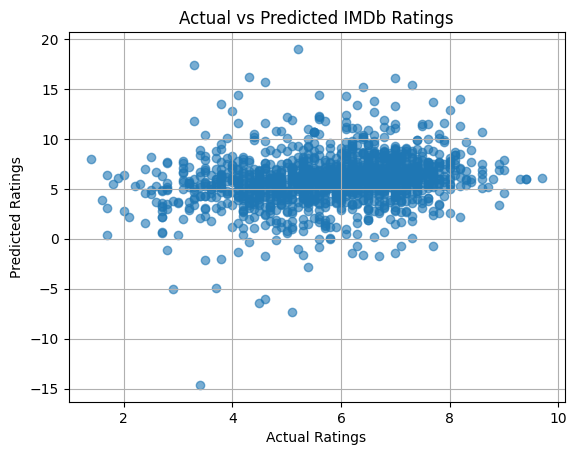

In [13]:
# Show comparison
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted IMDb Ratings")
plt.grid(True)
plt.show()